# Countries Clustering

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the data

In [2]:
countries_data = pd.read_csv("Country-data.csv");

## 1. EDA

Checking the columns of the data

In [3]:
countries_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
countries_data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

Checking the shape of the data

In [5]:
countries_data.shape

(167, 10)

In [6]:
countries_data.describe().round(2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,38.27,41.11,6.82,46.89,17144.69,7.78,70.56,2.95,12964.16
std,40.33,27.41,2.75,24.21,19278.07,10.57,8.89,1.51,18328.70
min,2.60,0.11,1.81,0.07,609.00,-4.21,32.10,1.15,231.00
25%,8.25,23.80,4.92,30.20,3355.00,1.81,65.30,1.80,1330.00
50%,19.30,35.00,6.32,43.30,9960.00,5.39,73.10,2.41,4660.00
75%,62.10,51.35,8.60,58.75,22800.00,10.75,76.80,3.88,14050.00
max,208.00,200.00,17.90,174.00,125000.00,104.00,82.80,7.49,105000.00


Checking for null values

In [7]:
100*countries_data.isnull().sum()/len(countries_data)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [8]:
countries_data['exports'] = countries_data['exports']*countries_data['gdpp']/100

In [9]:
countries_data['health'] = countries_data['health']*countries_data['gdpp']/100

In [10]:
countries_data['imports'] = countries_data['imports']*countries_data['gdpp']/100

### Outlier Check

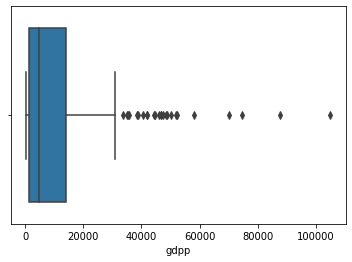

In [11]:
sns.boxplot(countries_data['gdpp'])

In [12]:
countries_data['gdpp'].quantile([0.85, 0.87, 0.88, 0.89, 0.9, 0.92,0.93, 0.94, 0.95, 0.97, 0.99])

0.85    31090.0
0.87    35510.0
0.88    38532.0
0.89    40158.0
0.90    41840.0
0.92    45724.0
0.93    46714.0
0.94    47440.0
0.95    48610.0
0.97    52218.0
0.99    79088.0
Name: gdpp, dtype: float64

In [13]:
cutoff = countries_data['gdpp'].quantile(0.94)

In [14]:
countries_data['gdpp'] = countries_data['gdpp'].apply(lambda x: cutoff if x>cutoff else x)

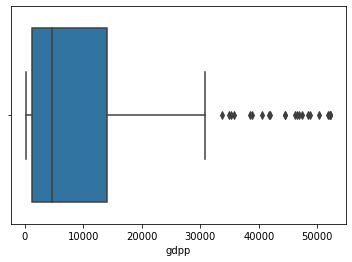

In [15]:
sns.boxplot(countries_data['gdpp'])

Checking outliers in child_mort field

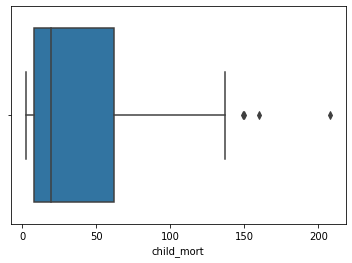

In [16]:
sns.boxplot(countries_data['child_mort'])

Capping the outliers in child_mort

In [17]:
cutoff = countries_data['child_mort'].quantile(0.97)

In [18]:
countries_data['child_mort'] = countries_data['child_mort'].apply(lambda x: cutoff if x>cutoff else x)

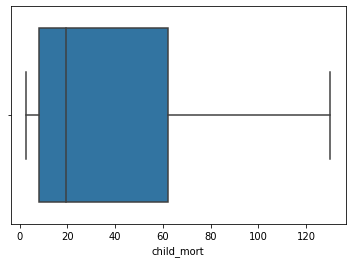

In [19]:
sns.boxplot(countries_data['child_mort'])

Checking for outliers in exports

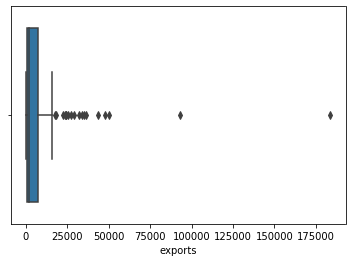

In [20]:
sns.boxplot(countries_data['exports'])

Capping outliers of exports

In [21]:
cutoff = countries_data['exports'].quantile(0.)

In [22]:
countries_data['exports'] = countries_data['exports'].apply(lambda x: cutoff if x>cutoff else x)

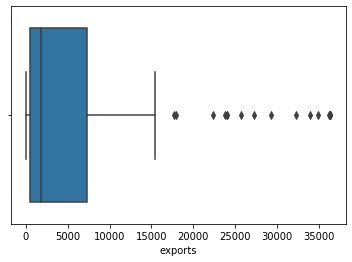

In [23]:
sns.boxplot(countries_data['exports'])

Checking outliers of health

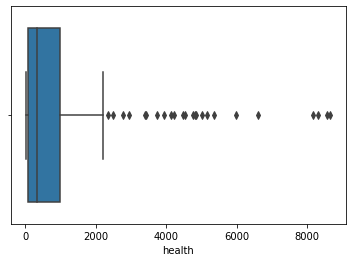

In [24]:
sns.boxplot(countries_data['health'])

In [25]:
cutoff = countries_data['health'].quantile(0.97)

In [26]:
countries_data['health'] = countries_data['health'].apply(lambda x: cutoff if x>cutoff else x)

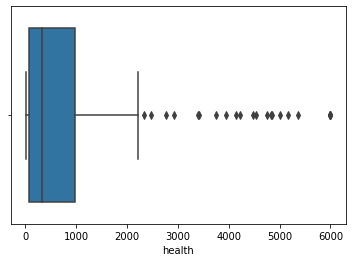

In [27]:
sns.boxplot(countries_data['health'])

Checking for outliers in income

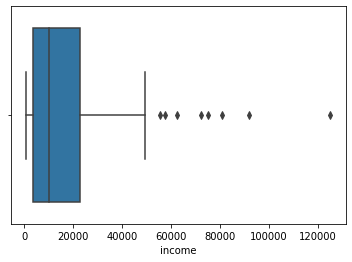

In [28]:
sns.boxplot(countries_data['income'])

In [29]:
cutoff = countries_data['income'].quantile(0.97)

In [30]:
countries_data['income'] = countries_data['income'].apply(lambda x: cutoff if x>cutoff else x)

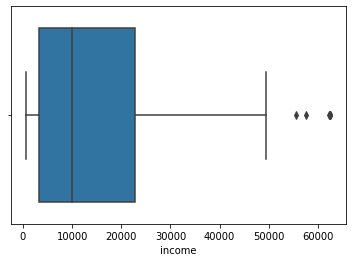

In [31]:
sns.boxplot(countries_data['income'])

Checking for outliers in imports

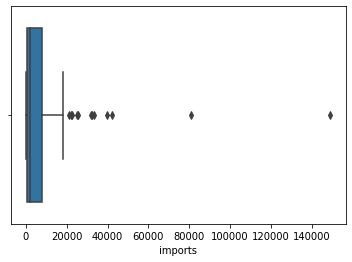

In [32]:
sns.boxplot(countries_data['imports'])

In [33]:
countries_data['imports'].quantile([0.85, 0.87, 0.88, 0.89, 0.9, 0.92,0.93, 0.94, 0.95, 0.97, 0.99])

0.85    11434.140
0.87    12088.216
0.88    12491.048
0.89    14231.408
0.90    15034.280
0.92    17589.264
0.93    19306.260
0.94    22266.328
0.95    24241.560
0.97    32507.456
0.99    55371.390
Name: imports, dtype: float64

In [34]:
cutoff = countries_data['imports'].quantile(0.97)

In [35]:
countries_data['imports'] = countries_data['imports'].apply(lambda x: cutoff if x>cutoff else x)

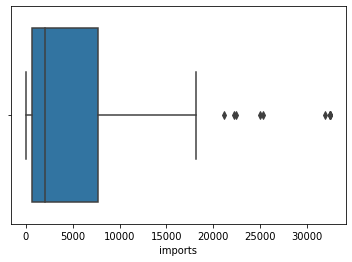

In [36]:
sns.boxplot(countries_data['imports'])

Checking for outliers on inflation

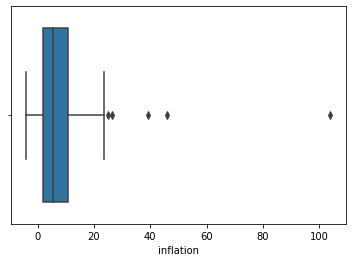

In [37]:
sns.boxplot(countries_data['inflation'])

In [38]:
countries_data['inflation'].quantile([0.85, 0.87, 0.88, 0.89, 0.9, 0.92,0.93, 0.94, 0.95, 0.97, 0.99])

0.85    15.330
0.87    16.100
0.88    16.508
0.89    16.600
0.90    16.640
0.92    18.424
0.93    19.538
0.94    20.704
0.95    20.870
0.97    23.626
0.99    41.478
Name: inflation, dtype: float64

In [39]:
cutoff = countries_data['inflation'].quantile(0.97)

In [40]:
countries_data['inflation'] = countries_data['inflation'].apply(lambda x: cutoff if x>cutoff else x)

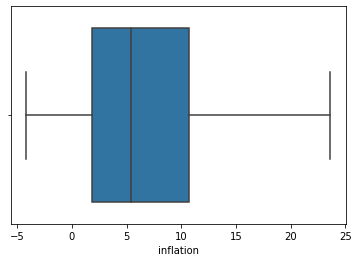

In [41]:
sns.boxplot(countries_data['inflation'])

Checking outliers on total fertility

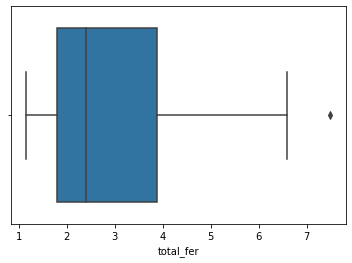

In [42]:
sns.boxplot(countries_data['total_fer'])

## Hopkins Statistic

In [43]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [44]:
#Let's check the Hopkins measure
hopkins(countries_data.drop('country', axis = 1))

0.9052364559633099

## Kmeans Clustering

In [45]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [46]:
scaler = StandardScaler()
x = scaler.fit_transform(countries_data[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']])

countries_data_scaled = pd.DataFrame(x)
countries_data_scaled.head()

,0,1,2,3,4,5,6,7,8
0,1.412036,-0.643696,-0.606962,-0.672781,-0.905600,0.359836,-1.619092,1.902882,-0.748206
1,-0.554472,-0.525732,-0.463018,-0.449705,-0.394557,-0.385144,0.647866,-0.859973,-0.520168
2,-0.268581,-0.464315,-0.515195,-0.525024,-0.212129,1.362173,0.670423,-0.038404,-0.496314
3,2.181539,-0.411654,-0.569579,-0.510413,-0.642093,2.310329,-1.179234,2.128151,-0.556273
4,-0.722801,-0.048875,-0.165059,0.216923,0.168696,-0.844172,0.704258,-0.541946,0.002701


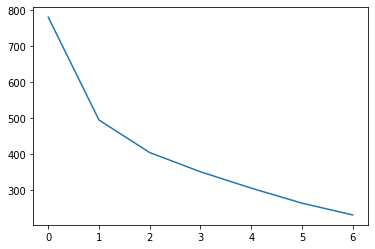

In [47]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(countries_data_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [48]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(countries_data_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(countries_data_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.48550739027825646
For n_clusters=3, the silhouette score is 0.4051731813533877
For n_clusters=4, the silhouette score is 0.3887868309972733
For n_clusters=5, the silhouette score is 0.36082566204035493
For n_clusters=6, the silhouette score is 0.33260237478156485
For n_clusters=7, the silhouette score is 0.3070765973117553
For n_clusters=8, the silhouette score is 0.3321966814647951


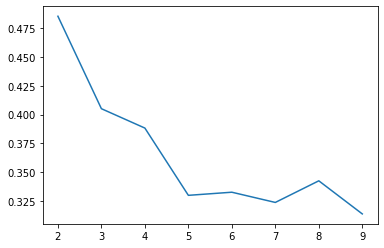

In [49]:
ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(countries_data_scaled)
    ss.append([k, silhouette_score(countries_data_scaled, kmeans.labels_)])
    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1]);

In [50]:
#Final Kmeans model with k=4

kmeans = KMeans(n_clusters=4,max_iter=50)
kmeans.fit(countries_data_scaled)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [51]:
kmeans.labels_

array([3, 1, 1, 3, 1, 1, 1, 2, 0, 1, 2, 2, 1, 1, 1, 0, 1, 3, 1, 1, 1, 3,
       1, 2, 1, 3, 3, 1, 3, 2, 1, 3, 3, 1, 1, 1, 3, 3, 3, 1, 3, 1, 2, 2,
       0, 1, 1, 1, 1, 3, 3, 1, 1, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 3, 3, 1,
       3, 1, 2, 1, 1, 1, 3, 0, 2, 2, 1, 2, 1, 1, 3, 3, 2, 1, 3, 1, 1, 3,
       3, 1, 1, 0, 1, 3, 3, 1, 1, 3, 0, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1,
       0, 2, 3, 3, 0, 2, 3, 1, 1, 1, 1, 1, 2, 0, 1, 1, 3, 1, 1, 3, 1, 1,
       3, 0, 2, 2, 3, 3, 2, 2, 1, 1, 3, 1, 0, 0, 1, 3, 1, 3, 3, 1, 1, 1,
       1, 3, 1, 0, 2, 2, 1, 1, 1, 1, 1, 3, 3])

In [52]:
countries_data['cluster'] = kmeans.labels_


In [53]:
countries_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,3
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,3
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


## Cluster Visualization

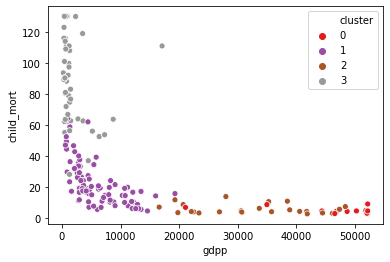

In [54]:
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue ='cluster', legend = 'full', data = countries_data, palette='Set1')

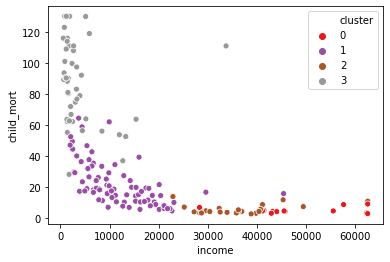

In [55]:
sns.scatterplot(x = 'income', y = 'child_mort', hue ='cluster', legend = 'full', data = countries_data, palette='Set1')

## Cluster Profiling

In [56]:
countries_data.cluster.value_counts()

1    81
3    48
2    25
0    13
Name: cluster, dtype: int64

In [57]:
countries_vitals = countries_data[['gdpp','income','child_mort','cluster']]

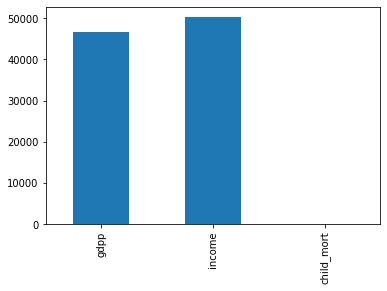

In [58]:
countries_vitals[countries_vitals.cluster==0].drop('cluster',axis=1).mean().plot.bar()

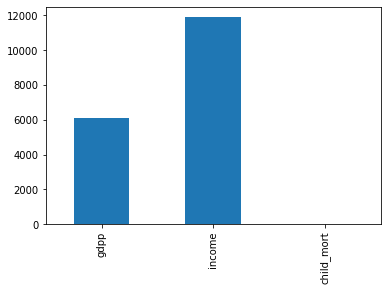

In [59]:
countries_vitals[countries_vitals.cluster==1].drop('cluster',axis=1).mean().plot.bar()

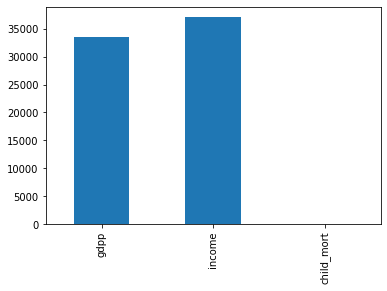

In [60]:
countries_vitals[countries_vitals.cluster==2].drop('cluster',axis=1).mean().plot.bar()

In [61]:
##countries_vitals[countries_vitals.cluster==3].drop('cluster',axis=1).mean().plot.bar()

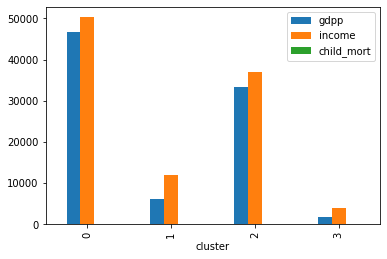

In [62]:
countries_vitals.groupby('cluster').mean().plot.bar()

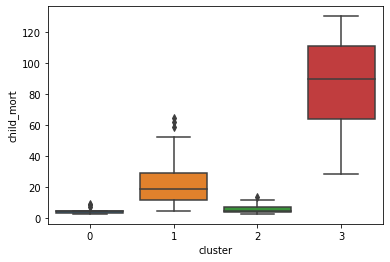

In [63]:
sns.boxplot(x='cluster',y='child_mort',data=countries_data)

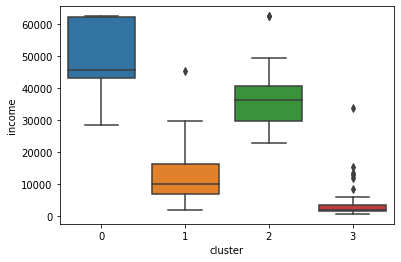

In [64]:
sns.boxplot(x='cluster',y='income',data=countries_data)

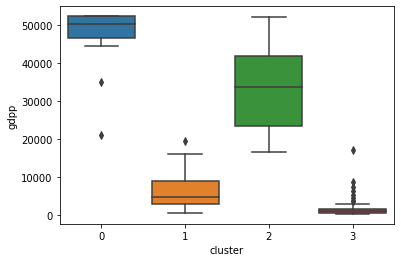

In [65]:
sns.boxplot(x='cluster',y='gdpp',data=countries_data)

In [69]:
countries_data[countries_vitals['cluster']==3].sort_values(by=['child_mort','gdpp','income'],ascending=[False,True,True])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
132,Sierra Leone,130.14,67.0320,52.2690,137.655,1220.0,17.200,55.0,5.20,399.0,3
31,Central African Republic,130.14,52.6280,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,3
66,Haiti,130.14,101.2860,45.7442,428.314,1500.0,5.450,32.1,3.33,662.0,3
97,Mali,130.14,161.4240,35.2584,248.508,1870.0,4.370,59.5,6.55,708.0,3
32,Chad,130.14,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.59,897.0,3
113,Nigeria,130.00,589.4900,118.1310,405.420,5150.0,23.626,60.5,5.84,2330.0,3
112,Niger,123.00,77.2560,17.9568,170.868,814.0,2.550,58.8,7.49,348.0,3
3,Angola,119.00,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,3
37,"Congo, Dem. Rep.",116.00,137.2740,26.4194,165.664,609.0,20.800,57.5,6.54,334.0,3
25,Burkina Faso,116.00,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,3


## Heirachichal Clustering

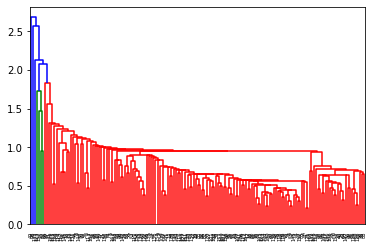

In [67]:
# single linkage
mergings = linkage(countries_data_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

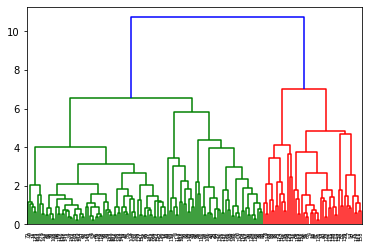

In [68]:
# single linkage
mergings = linkage(countries_data_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()